In [3]:
!pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 27.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=741503056b70052404a100bc3300844d1393bb00bb4a74451f6c98c932942367
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordcloud-1.8.2.2:
      Successfully uninstalled wordcloud-1.8.2.2


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from ydata_profiling import ProfileReport
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn.dummy import DummyClassifier
#from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score,recall_score, precision_score, roc_curve, roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [5]:
RANDOM_STATE = 12345
TEST_SIZE = 0.20

In [6]:
from google.colab import files
files.upload()

Saving online_shoppers_intention.csv to online_shoppers_intention.csv


{'online_shoppers_intention.csv': b'Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue\n0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False\n0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False\n0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False\n0,0.0,0,0.0,2,2.666666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False\n0,0.0,0,0.0,10,627.5,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False\n0,0.0,0,0.0,19,154.2166667,0.015789474,0.024561404,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False\n0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False\n1,0.0,0,0.0,0,0.0,0.2,0.2,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False\n0,0.0,0,0.0,2,37.0,0.0,,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,Fal

# описание датасета

Online Shoppers Purchasing Intention Dataset

The Revenue attribute can be used as the class label.

Administrative, Administrative Duration, Informational, Informational Duration, Product Related and Product Related Duration represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.

The Bounce Rate, Exit Rate and Page Value features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of Bounce Rate feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The Page Value feature represents the average value for a web page that a user visited before completing an e-commerce transaction.

The Special Day feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.

The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.


- **Revenue** может быть использован в качестве метки класса.
- **Administrative, Administrative Duration, Informational, Informational Duration, Product Related and Product Related Duration** представляют количество различных типов страниц, посещенных посетителем за этот сеанс, и общее время, проведенное в каждой из этих категорий страниц. Значения этих функций выводятся из информации об URL-адресах страниц, посещаемых пользователем, и обновляются в режиме реального времени, когда пользователь совершает какое-либо действие, например, переходит с одной страницы на другую.
- **Bounce Rate** характеристика веб-страницы относится к проценту посетителей, которые заходят на сайт с этой страницы, а затем покидают его (Bounce, "отскакивают"), не вызывая никаких других запросов к серверу аналитики в течение этого сеанса. (metrics measured by "Google Analytics")
- **Exit Rate** значения для конкретной веб-страницы рассчитывается как для всех просмотров страницы в процентах, которые были последними в сеансе.
(metrics measured by "Google Analytics")
- **Page Value** представляет среднее значение для веб-страницы, которую пользователь посетил перед завершением транзакции электронной коммерции (metrics measured by "Google Analytics")
- **Special Day** функция указывает на близость времени посещения сайта к определенному особому дню (например, Дню матери, Дню Святого Валентина), в который сеансы с большей вероятностью завершатся транзакцией. Значение этого атрибута определяется с учетом динамики электронной коммерции, такой как промежуток времени между датой заказа и датой доставки. Например, для дня Святого Валентина это значение принимает ненулевое значение в период со 2 по 12 февраля, ноль до и после этой даты, если только она не близка к другому особому дню, и его максимальное значение равно 1 8 февраля.
- Набор данных также включает операционную систему, браузер, регион, тип трафика, тип посетителя как возвращающегося или нового посетителя,(**Operating System, Browser, Region, Traffic Type, Visitor Type**) логическое значение, указывающее, является ли дата посещения выходным днем, и месяц года (**Weekend, Month**).


Цель: предсказать возможность покупки (выявить максимально влияющие признаки), задача классификации

In [7]:
df = pd.read_csv('online_shoppers_intention.csv')

In [8]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12131 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  11839 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12231 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [9]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12131.000000,12330.000000,11839.000000,12330.000000,12231.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.724502,31.731468,1190.534914,0.022191,0.043021,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,141.655684,44.475503,1908.447706,0.048488,0.048562,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,183.854167,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,597.625000,0.003112,0.025141,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1462.554562,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
# создадим отчет по сырым данным

profile_report = ProfileReport(df, title = 'Revenue_row Profiling Report')
profile_report.to_file('revenue_row_report.html')


In [ ]:
# рассмотрим соотношение значений у целевой переменной

df['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

Предварительные выводы
- есть пропуски, есть неудобные форматы: object и bool, посмотрим можно ли их заменить на int.
(для столбцов Month, Weekend, Revenue, VisitorType)
- у целевой переменной насбалансированные значения False\True

In [9]:
# для дальнейших трансформаций создадим копию файла

df_copy = df.copy()

# пропуски и дубликаты

In [15]:
df.isnull().mean() * 100

Administrative             0.000000
Administrative_Duration    0.000000
Informational              0.000000
Informational_Duration     1.613950
ProductRelated             0.000000
ProductRelated_Duration    3.982157
BounceRates                0.000000
ExitRates                  0.802920
PageValues                 0.000000
SpecialDay                 0.000000
Month                      0.000000
OperatingSystems           0.000000
Browser                    0.000000
Region                     0.000000
TrafficType                0.000000
VisitorType                0.000000
Weekend                    0.000000
Revenue                    0.000000
dtype: float64

In [16]:
df[df.duplicated()]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
178,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
418,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,1,1,1,1,Returning_Visitor,True,False
456,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,4,1,Returning_Visitor,False,False
512,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,1,1,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11827,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,2,2,1,1,Returning_Visitor,False,False
11938,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,4,1,Returning_Visitor,True,False
12159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,3,Returning_Visitor,False,False
12180,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,13,9,20,Returning_Visitor,False,False


- пропуски замечены в столбцах Informational_Duration , ProductRelated_Duration, ExitRates
везде меньше 5%, заменим на медианные значения
- дубликаты могут быть реальными одинаковыми значениями, оставлю как есть


In [10]:
df_copy['Informational_Duration'].fillna(df_copy['Informational_Duration'].median(), inplace=True)
df_copy['ProductRelated_Duration'].fillna(df_copy['ProductRelated_Duration'].median(), inplace=True)
df_copy['ExitRates'].fillna(df_copy['ExitRates'].median(), inplace=True)

In [18]:
df_copy.isnull().mean() * 100

Administrative             0.0
Administrative_Duration    0.0
Informational              0.0
Informational_Duration     0.0
ProductRelated             0.0
ProductRelated_Duration    0.0
BounceRates                0.0
ExitRates                  0.0
PageValues                 0.0
SpecialDay                 0.0
Month                      0.0
OperatingSystems           0.0
Browser                    0.0
Region                     0.0
TrafficType                0.0
VisitorType                0.0
Weekend                    0.0
Revenue                    0.0
dtype: float64

# замена значений

In [11]:
# начнем с Month
df['Month'].value_counts()

May     3348
Nov     2980
Mar     1897
Dec     1713
Oct      545
Sep      446
Aug      431
Jul      429
June     288
Feb      183
aug       70
Name: Month, dtype: int64

In [12]:
df['Month'].unique()

array(['Feb', 'aug', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov',
       'Sep', 'Dec'], dtype=object)

In [19]:
df['Month'].value_counts()

May     3348
Nov     2980
Mar     1897
Dec     1713
Oct      545
Sep      446
Aug      431
Jul      429
June     288
Feb      183
aug       70
Name: Month, dtype: int64

In [13]:
# заменим текстовые значения числовыми

df_copy['Month'].replace({'Feb': 2,'Mar': 3,
                         'May': 5,'June': 6,
                         'Jul': 7,'Aug': 8,
                         'aug': 8,
                         'Sep': 9,'Oct': 10,
                         'Nov': 11,'Dec': 12},inplace = True)

In [14]:
df_copy['Month'].value_counts()

5     3348
11    2980
3     1897
12    1713
10     545
8      501
9      446
7      429
6      288
2      183
Name: Month, dtype: int64

In [22]:
df['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [15]:
# заменим текстовые значения числовыми

df_copy['VisitorType'].replace({'Returning_Visitor': 1,
                         'New_Visitor': 2,
                         'Other': 3},inplace = True)

In [25]:
df['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [26]:
df['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [16]:
# заменим текстовые значения числовыми

df_copy['Revenue'].replace({False: 0,
                             True: 1},inplace = True)

In [28]:
df_copy['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [29]:
df['Weekend'].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

In [17]:
# заменим булевые значения числовыми

df_copy['Weekend'].replace({False: 0,
                             True: 1},inplace = True)

In [31]:
df_copy['Weekend'].value_counts()

0    9462
1    2868
Name: Weekend, dtype: int64

In [18]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int64  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
profile_report = ProfileReport(df_copy, title = 'Revenue Profiling Report')

In [ ]:
profile_report.to_file('revenue_report.html')

# корреляции

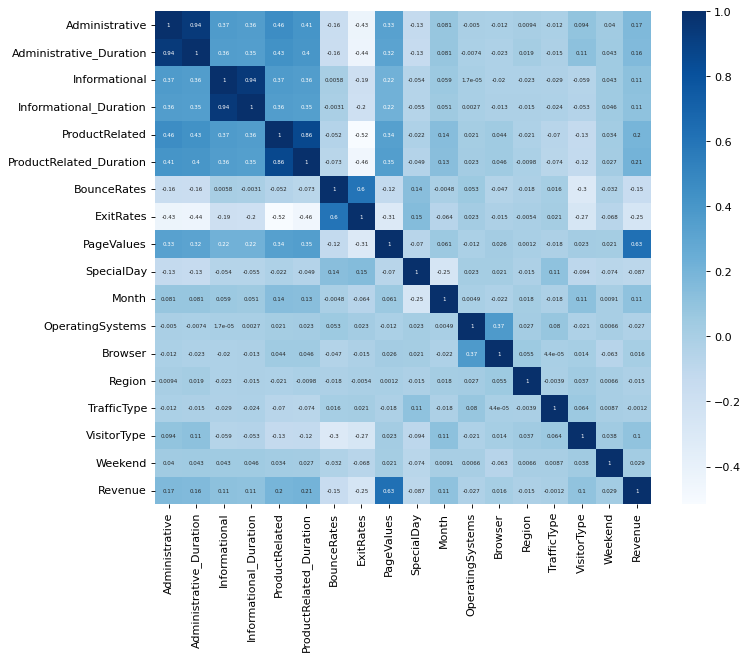

In [ ]:
# Корреляция Пирсона

corr = df_copy.corr(method='spearman')
plt.figure(figsize = (10,8), dpi= 80)
sns.heatmap(corr, cmap="Blues", annot=True, annot_kws = {'fontsize':5});

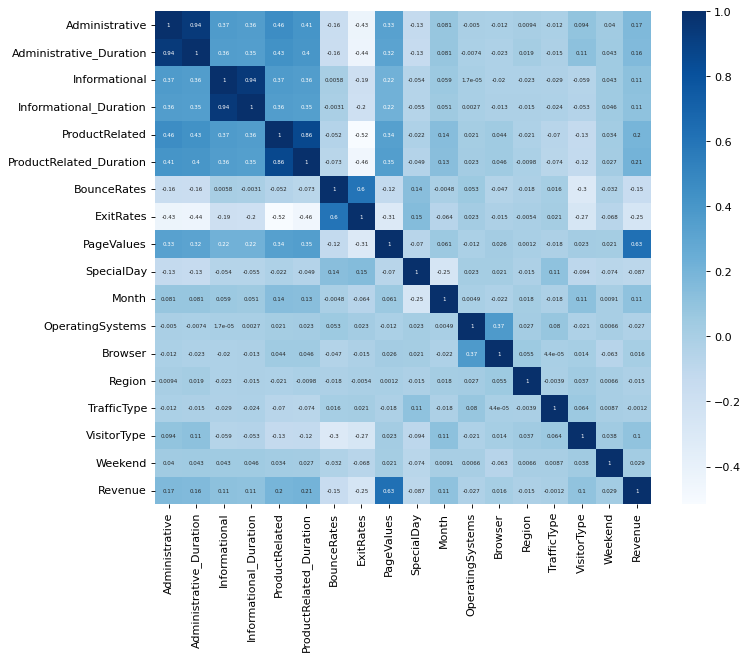

In [ ]:
# Корреляция Cпирмана

corr = df_copy.corr(method='spearman')
plt.figure(figsize = (10,8), dpi= 80)
sns.heatmap(corr, cmap="Blues", annot=True, annot_kws = {'fontsize':5});

интересно что самую высокую корреляцию с целевым признаком дает **PageValues**
подробнее что это такое и как расчитывается, тут
https://yoast.com/what-is-page-value-in-google-analytics/

In [77]:
df_pv = df_copy[df_copy['PageValues']>0].groupby('PageValues').agg(RevenueCount = ('Revenue','count'),
                                                                   Administrative_D = ('Administrative_Duration','sum'),
                                                                   Informational_D = ('Informational_Duration','sum'),
                                                                   ProductRelated_D = ('ProductRelated_Duration','sum')).sort_values(by = 'PageValues', ascending=False).reset_index()

In [94]:
df_pv.head(20)

,PageValues,RevenueCount,Administrative_D,Informational_D,ProductRelated_D
0,361.763742,1,37.500000,0.0,607.500000
1,360.953384,1,0.000000,0.0,784.883333
2,287.953793,1,0.000000,0.0,366.500000
3,270.784693,1,0.000000,0.0,432.000000
4,261.491286,1,172.200000,0.0,792.722222
5,258.549873,1,59.400000,0.0,891.568795
6,255.569158,1,27.500000,0.0,1403.720238
7,254.607158,1,47.500000,0.0,331.333333
8,246.758590,1,158.200000,0.0,597.625000
9,239.980000,1,0.000000,0.0,303.400000


In [95]:
df_pv.describe()

,PageValues,RevenueCount,Administrative_D,Informational_D,ProductRelated_D
count,2703.000000,2703.000000,2703.000000,2703.000000,2703.000000
mean,26.475243,1.009989,157.499679,78.140184,2129.558099
std,31.790533,0.134294,232.595547,204.989526,2521.013090
min,0.038035,1.000000,0.000000,0.000000,4.000000
25%,7.161519,1.000000,19.916667,0.000000,689.221970
50%,16.539091,1.000000,83.000000,0.000000,1359.771429
75%,34.321442,1.000000,198.329252,49.450000,2561.840833
max,361.763742,6.000000,2629.253968,2166.500000,43171.233380


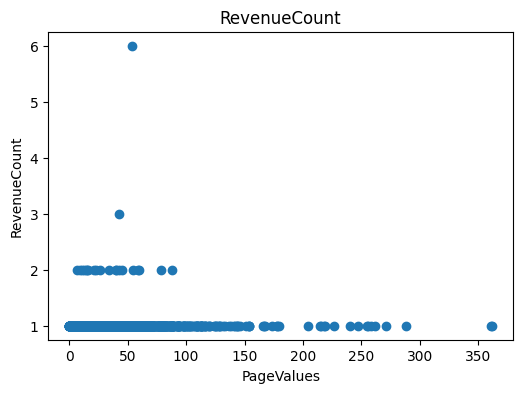

In [93]:
plt.figure(figsize=(6,4))

plt.scatter(df_pv['PageValues'], df_pv['RevenueCount'])
plt.title('RevenueCount')
plt.xlabel('PageValues')
plt.ylabel('RevenueCount');

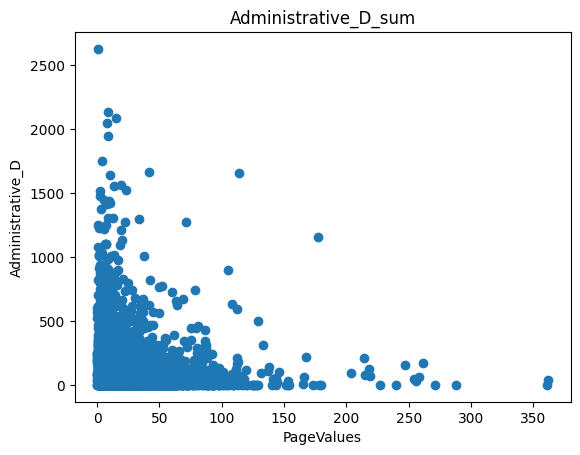

In [89]:
plt.scatter(df_pv['PageValues'], df_pv['Administrative_D'])
plt.title('Administrative_D_sum')
plt.xlabel('PageValues')
plt.ylabel('Administrative_D');

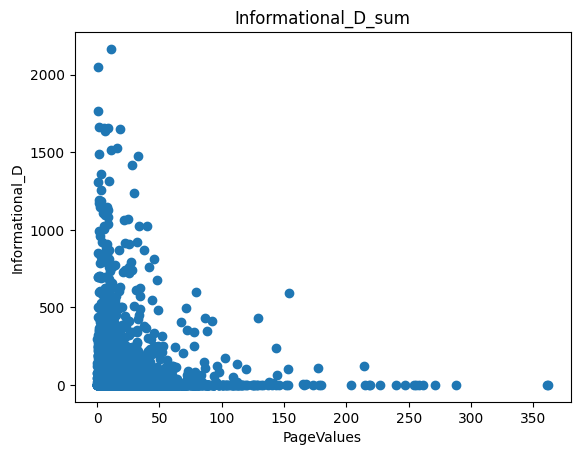

In [90]:
plt.scatter(df_pv['PageValues'], df_pv['Informational_D'])
plt.title('Informational_D_sum')
plt.xlabel('PageValues')
plt.ylabel('Informational_D');

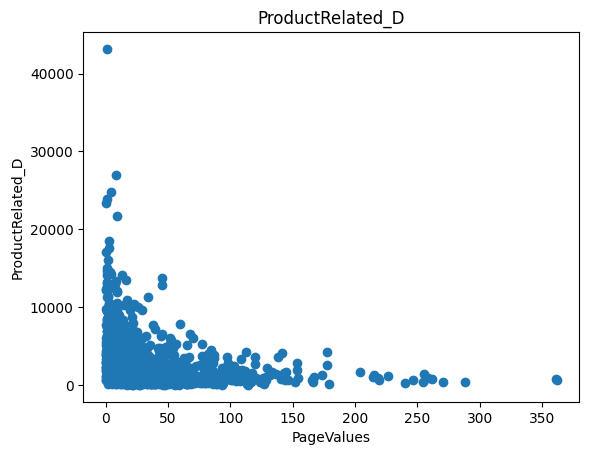

In [91]:
plt.scatter(df_pv['PageValues'], df_pv['ProductRelated_D'])
plt.title('ProductRelated_D')
plt.xlabel('PageValues')
plt.ylabel('ProductRelated_D');

In [107]:
# посмотрим на распределение значений в зависимости от региона

df_region = df_copy.groupby('Region').agg(RevenueSum=('Revenue','sum'),
                              RevenueCount=('Revenue','count')).sort_values(by = 'RevenueCount', ascending=False).reset_index()

In [116]:
df_region['Revenue_%'] = (df_region['RevenueSum']/df_region['RevenueCount']*100).apply(lambda x: round(x))

In [117]:
df_region

,Region,RevenueSum,RevenueCount,Revenue_%
0,1,771,4780,16
1,3,349,2403,15
2,4,175,1182,15
3,2,188,1136,17
4,6,112,805,14
5,7,119,761,16
6,9,86,511,17
7,8,56,434,13
8,5,52,318,16


In [118]:
# посмотрим на распределение значений в зависимости от месяца

df_month = df_copy.groupby('Month').agg(RevenueSum = ('Revenue','sum'),
                             RevenueCount = ('Revenue','count'),
                             Weekend = ('Weekend','sum'),
                             ).sort_values(by = 'Month', ascending=True)

In [119]:
df_month['Revenue_%'] = (df_month['RevenueSum']/df_month['RevenueCount']*100).apply(lambda x: round(x))

In [120]:
df_month

,RevenueSum,RevenueCount,Weekend,Revenue_%
Month,,,,
2,3,183,28,2
3,190,1897,478,10
5,363,3348,712,11
6,29,288,47,10
7,64,429,102,15
8,92,501,115,18
9,86,446,95,19
10,115,545,143,21
11,753,2980,788,25


Предварительный вывод:
- ожидаемо, страница ProductRelated имеет гораздо больше высоких значений PageValues, но две другие тоже вносят свой вклад в конверсию
- очень хорошая конверсия в ноябре, при этом максимальное количество покупок, в мае несмотря на большое количество посещений и общее число покупок конверсия была небольшой
- вцелом, очевидного лидера влияющего на покупку выявить не удалось
- есть взаимная корреляция для страницы и времени нахождения, будем оставлять что-то одно
- есть корреляция между броузером и системой, возможно тоже оставим только один признак  

# ML

In [92]:
df_copy.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [19]:
Y = df_copy['Revenue'] # целевая переменная
X = df_copy[['Administrative_Duration','Informational_Duration','ProductRelated_Duration',
                    'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
                    'OperatingSystems', 'Region', 'TrafficType', 'VisitorType',
                    'Weekend']] # матрица объект-признак


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = TEST_SIZE,random_state = RANDOM_STATE)

In [21]:
#проверим размеры полученных выборок

print("X_train :",X_train.shape)
print("X_test :",X_test.shape)
print("Y_train :",Y_train.shape)
print("Y_test :",Y_test.shape)

X_train : (9864, 13)
X_test : (2466, 13)
Y_train : (9864,)
Y_test : (2466,)


## полезные функции

In [22]:
def aucroc_curve(predictions, predictions_one, a):
    print('F1-мера для',a,':', f1_score(Y_test,predictions))
    print('AUC-ROC',a,':', roc_auc_score(Y_test, predictions_one))
    print('матрица ошибок',a)
    print(confusion_matrix(Y_test,predictions))
    print("")
    fpr, tpr, thresholds = roc_curve(Y_test, predictions_one)
    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.show()

In [23]:
def LgR_best(X,Y, class_weight):
    solvers=['newton-cg','lbfgs','liblinear']
    best_f1_LgR = 0.0
    best_model_LgR = None
    for s in solvers:
        for m in range(100,1000,100):
            model_LgR = LogisticRegression(random_state=12345, solver=s, max_iter=m,class_weight = class_weight)
            model_LgR.fit(X_train,Y_train)
            result_LgR = model_LgR.predict(X_train)
            f1_LgR = f1_score(Y_train,result_LgR)

            if f1_LgR > best_f1_LgR:
                best_f1_LgR = f1_LgR
                best_model_LgR = model_LgR
    return best_model_LgR, best_f1_LgR

In [27]:
def RFC_best(features,target, class_weight):
    best_f1_RFC = 0
    best_model_RFC = None
    for e in range(1,100,10):
        for d in range(1,25):
            model_RFC = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=e, max_depth = d,class_weight = class_weight)
            model_RFC.fit(X_train,Y_train)
            result_RFC = model_RFC.predict(X_test)
            f1_RFC = f1_score(Y_test, result_RFC)


            if f1_RFC > best_f1_RFC:
                best_f1_RFC = f1_RFC
                best_model_RFC = model_RFC

    return best_model_RFC, best_f1_RFC

In [24]:
def DTC_best(X_train,Y_train, class_weight):
    splitter = ['best', 'random']
    criterion = ['gini','entropy']
    best_f1_DFC = 0
    best_model_DFC = None

    for s in splitter:
        for c in criterion:
            for d in range(1,15):
                model_DTC = DecisionTreeClassifier(random_state = RANDOM_STATE, criterion = c,splitter = s, max_depth = d,class_weight = class_weight)
                model_DTC.fit(X_train,Y_train)
                result = model_DTC.predict(X_test)
                f1_DFC = f1_score(Y_test, result)

                if f1_DFC > best_f1_DFC:
                    best_f1_DFC = f1_DFC
                    best_model_DFC = model_DTC

    return best_model_DFC, best_f1_DFC

## LinearRegression

In [25]:
print("(best_model_LgR_standart), F1-мера LgR_standart : ", LgR_best(X_train,Y_train, None))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

(best_model_LgR_standart), F1-мера LgR_standart :  (LogisticRegression(max_iter=300, random_state=12345), 0.4859649122807017)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1-мера для LgR_standart : 0.5149501661129569
AUC-ROC LgR_standart : 0.8458276113741345
матрица ошибок LgR_standart
[[2019   43]
 [ 249  155]]



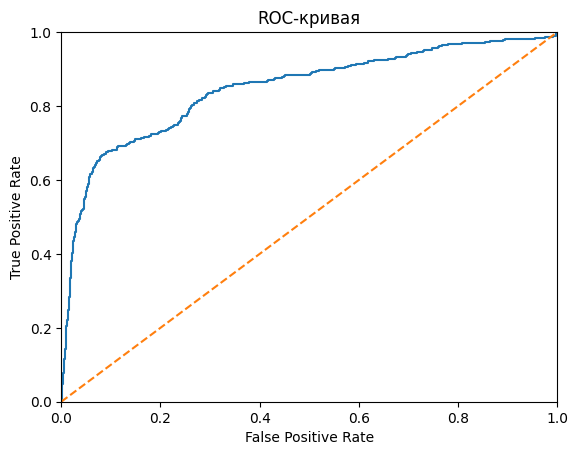

In [26]:
#обучим модель, используя наилучшие параметры

model_LgR_st = LogisticRegression(random_state=RANDOM_STATE, max_iter=300)
model_LgR_st.fit(X_train,Y_train)
predictions_valid_LgR_st = model_LgR_st.predict(X_test)

predictions_one_valid_LgR_st =  model_LgR_st.predict_proba(X_test)[:,1]
# используем функцию aucroc_curve
aucroc_curve(predictions_valid_LgR_st, predictions_one_valid_LgR_st, 'LgR_standart')

LgR_st_ = (f1_score(Y_test,predictions_valid_LgR_st)).round(3)
LgR_st = (roc_auc_score(Y_test, predictions_one_valid_LgR_st)).round(3)

## RandomForestClassifier

In [29]:
#RandomForestClassifier

print("(best_model_RFC_standart), F1-мера RFC_standart : ", RFC_best(X_train,Y_train, None))

(best_model_RFC_standart), F1-мера RFC_standart :  (RandomForestClassifier(max_depth=3, n_estimators=1, random_state=12345), 0.6815511163337251)


F1-мера для RFC_standart : 0.6815511163337251
AUC-ROC RFC_standart : 0.8989566027407785
матрица ошибок RFC_standart
[[1905  157]
 [ 114  290]]



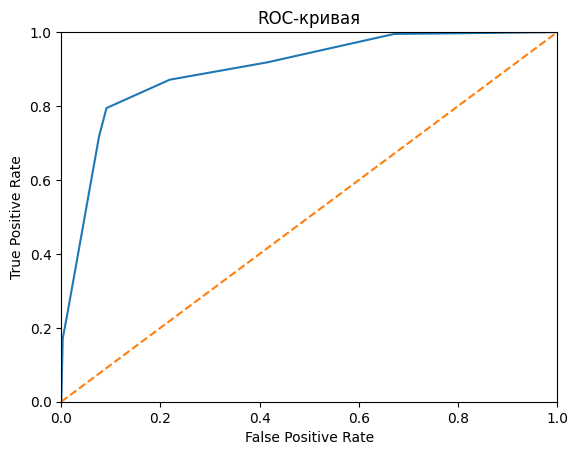

In [30]:
#обучим модель, используя наилучшие параметры
model_RFC_st = RandomForestClassifier(random_state = RANDOM_STATE, n_estimators=1 , max_depth = 3)
model_RFC_st.fit(X_train,Y_train)
predictions_valid_RFC_st = model_RFC_st.predict(X_test)
predictions_one_valid_RFC_st =  model_RFC_st.predict_proba(X_test)[:,1]
# используем функцию aucroc_curve
aucroc_curve(predictions_valid_RFC_st, predictions_one_valid_RFC_st, 'RFC_standart')

RFC_st_ = (f1_score(Y_test,predictions_valid_RFC_st)).round(3)
RFC_st = (roc_auc_score(Y_test, predictions_one_valid_RFC_st)).round(3)